In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial = pd.read_csv("data/clinicaltrial_data.csv")

In [2]:
# Combine the data into a single dataset
mouse_clinical_combine = pd.merge(clinical_trial, mouse_drug,how='left', on="Mouse ID")

# Display the data table for preview
mouse_clinical_combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean "Tumor Volume Data" Grouped by Drug and Timepoint 
combine_group_mean = mouse_clinical_combine.groupby(["Drug","Timepoint"])
tumor=combine_group_mean["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_df = pd.DataFrame(tumor)
tumor_df.reset_index(level = None, inplace = True)

# Preview DataFrame
tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
group_sem = mouse_clinical_combine.groupby(["Drug","Timepoint"])
combine_group_sem=group_sem["Tumor Volume (mm3)"].sem()


# Convert to DataFrame
tumor_sem_df = pd.DataFrame(combine_group_sem)
tumor_sem_df.reset_index(level = None, inplace = True)

# Preview DataFrame 
tumor_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table = tumor_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
#Preview the formatted table
pivot_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
pivot_table_sem=tumor_sem_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


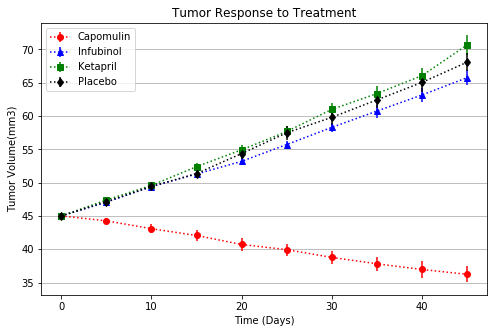

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (8, 5))

plt.errorbar(x=pivot_table.index,y=pivot_table['Capomulin'], yerr=pivot_table_sem['Capomulin'], linestyle=":", fmt='o', label="Capomulin",color='red')
plt.errorbar(x=pivot_table.index,y=pivot_table['Infubinol'], yerr=pivot_table_sem['Infubinol'],  linestyle=":", fmt='^', label='Infubinol',color='blue')
plt.errorbar(x=pivot_table.index,y=pivot_table['Ketapril'], yerr=pivot_table_sem['Ketapril'], linestyle=":",fmt='s', label='Ketapril',color='green')
plt.errorbar(x=pivot_table.index,y=pivot_table['Placebo'],  yerr=pivot_table_sem['Placebo'],  linestyle=":", fmt='d', label='Placebo',color='black')

plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.grid(axis='y')
plt.legend()       
plt.show()
plt.savefig("tumor.png")

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
group_metastatic = mouse_clinical_combine.groupby(["Drug","Timepoint"])
metastatic_response=group_sem["Metastatic Sites"].mean()

# Convert to DataFrame
metastatic_response_df = pd.DataFrame(metastatic_response)
# Preview DataFrame
metastatic_response_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_response_sem=group_metastatic["Metastatic Sites"].sem()

# Convert to DataFrame
metastatic_response_sem_df=pd.DataFrame(metastatic_response_sem)

# Preview DataFrame
metastatic_response_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
metastatic_response_df.reset_index(level = None, inplace = True)
metastatic_response_pivot=metastatic_response_df.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
metastatic_response_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [16]:
metastatic_response_sem_df.reset_index(level = None, inplace = True)
metastatic_response_sem_pivot=metastatic_response_sem_df.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
metastatic_response_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


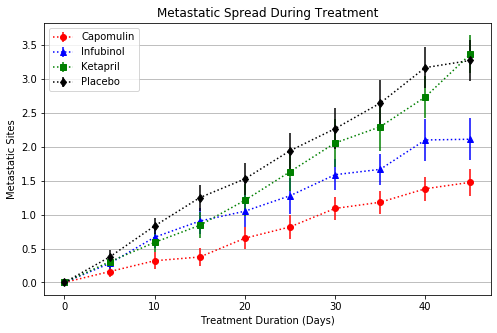

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize = (8, 5))

plt.errorbar(x=metastatic_response_pivot.index,y=metastatic_response_pivot['Capomulin'], yerr=metastatic_response_sem_pivot['Capomulin'], linestyle=":", fmt='o', label="Capomulin",color='red')
plt.errorbar(x=metastatic_response_pivot.index,y=metastatic_response_pivot['Infubinol'], yerr=metastatic_response_sem_pivot['Infubinol'],  linestyle=":", fmt='^', label='Infubinol',color='blue')
plt.errorbar(x=metastatic_response_pivot.index,y=metastatic_response_pivot['Ketapril'], yerr=metastatic_response_sem_pivot['Ketapril'], linestyle=":",fmt='s', label='Ketapril',color='green')
plt.errorbar(x=metastatic_response_pivot.index,y=metastatic_response_pivot['Placebo'],  yerr=metastatic_response_sem_pivot['Placebo'],  linestyle=":", fmt='d', label='Placebo',color='black')

plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.title("Metastatic Spread During Treatment")
plt.grid(axis='y')
plt.legend()       
plt.show()
plt.savefig("metastatic.png")

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
MiceCount=combine_group_mean["Mouse ID"].count()
# Convert to DataFrame
MiceCount_df=pd.DataFrame(MiceCount)
# Preview DataFrame
MiceCount_df.reset_index(level = None, inplace = True)
MiceCount_df

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mice_count = MiceCount_df.pivot(index ="Timepoint", columns = 'Drug', values = "Mouse ID")

# Preview the Data Frame
mice_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


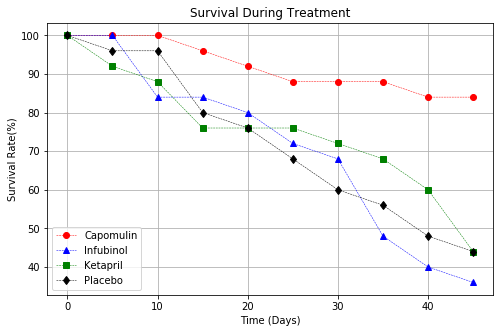

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (8, 5))

drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]

for drug, marker,colors in drug_format_list:
    total_mouse = mice_count[drug][0]
    survival_rate = (mice_count[drug]/total_mouse)*100
    survival_treatment_plt = plt.plot(mice_count.index,survival_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5, label=drug)


plt.ylabel("Survival Rate(%)")
plt.xlabel("Time (Days)")
plt.title("Survival During Treatment")
plt.grid()
plt.legend()       
plt.show()
plt.savefig("survival.png")

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
percentage_change = (pivot_table.iloc[-1]/(pivot_table.iloc[0])-1)*100
# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

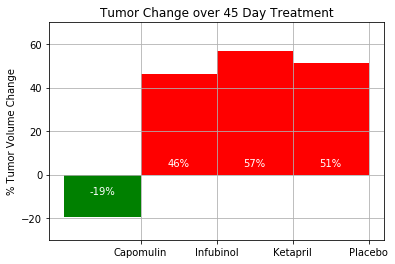

In [21]:
# Splice the data between passing and failing drugs
passing = percentage_change < 0

# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(percentage_change[durg])for durg in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def label(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 3
        else:
            label_position = -10
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
label(change_plt)

# Save the Figure
plt.savefig("lineConfig.png")

![Metastatic Spread During Treatment](../Images/change.png)

Trend:
#1 Capomulin works better than the other three drugs, through the barchart "Tumor Change Over 45 Day Treatment" which shows only cagpomulin's tumor change percentage is negative.
#2 According to the "Survival Druing Treatment" chart, metastical spread is usually very fast within one month, which is highly related to survival rate, except Capomulin.
#3 Based on the graph 'Tumor Response',  the drug Capomulin had a better result, the tumors volume for the mice taking Capomulin shrunk during trial while for the mice taking the other drugs, tumors volume grew almost with the same rate.